In [76]:
#goal: run knn with the asl alphabet

#need to classify pictures of the asl alphabet as the correct letter
#use knn to classify the pictures
#use the asl alphabet dataset


In [27]:
import numpy as np
from matplotlib import image as mpimg
from skimage.feature import hog
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import os
from sklearn.neighbors import KNeighborsClassifier


(200, 200, 3)


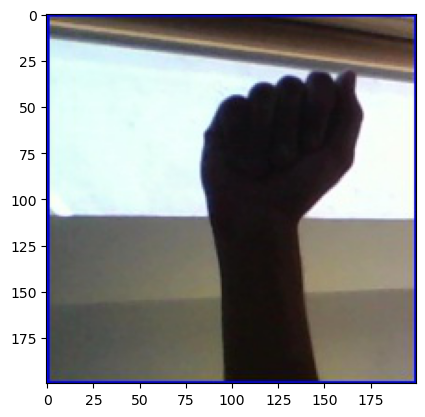

In [3]:
img = np.array(mpimg.imread('asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\A_test.jpg'))
img.setflags(write=1)
print(img.shape)
plt.imshow(img)
plt.show()

(8100,)
[0.08720775 0.05749991 0.08790799 ... 0.01256223 0.03981274 0.0332238 ]
(100, 100)


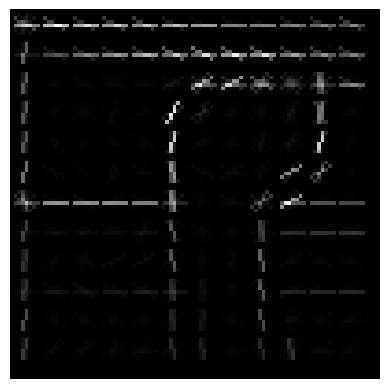

In [4]:
from skimage.feature import hog
import cv2 as cv
import matplotlib.pyplot as plt

resizedImg = cv.resize(img, (100, 100))
plt.imshow(resizedImg)

fd, hogImage = hog(resizedImg, visualize=True, channel_axis=-1)
print(fd.shape)
print(fd)
print(hogImage.shape)
plt.axis('off')
plt.imshow(hogImage, cmap=plt.cm.gray)
plt.show()

In [39]:
alphabetTrainingArray = ['A', 'B', 'C', 'D','del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N','nothing', 'O', 'P', 'Q', 'R', 'S','space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
#alphabetTrainingArray = ['A']
trainArr = []

for letter in alphabetTrainingArray:
    print(letter)
    img_dir = os.path.join('asl-alphabet', 'versions', '1', 'asl_alphabet_train', 'asl_alphabet_train', letter)
    if os.path.exists(img_dir) and os.path.isdir(img_dir):
        counter = 0
        for entry in glob.glob(os.path.join(img_dir, '*.jpg')):
            img = np.array(mpimg.imread(entry))
            resizedImg = cv.resize(img, (64, 64))
            fd, hogImage = hog(img, visualize=True, channel_axis=-1)
            trainArr.append(fd)
            counter += 1
            if counter >= 50:
                break
    else:
        print(f"Directory {img_dir} does not exist or is not accessible.")


A
B
C
D
del
E
F
G
H
I
J
K
L
M
N
nothing
O
P
Q
R
S
space
T
U
V
W
X
Y
Z


In [40]:
print(len(trainArr))
trainLabelArray = []
for i, label in enumerate(alphabetTrainingArray):
    for j in range(50):
        trainLabelArray.append(label)

1450


In [41]:
#make testing data
alphabetTrainingArray = ['A', 'B', 'C', 'D','del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N','nothing', 'O', 'P', 'Q', 'R', 'S','space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
#alphabetTrainingArray = ['A']
testArr = []

for letter in alphabetTrainingArray:
    print(letter)
    img_dir = os.path.join('asl-alphabet', 'versions', '1', 'asl_alphabet_train', 'asl_alphabet_train', letter)
    if os.path.exists(img_dir) and os.path.isdir(img_dir):
        counter = 0
        for entry in glob.glob(os.path.join(img_dir, '*.jpg')):
            img = np.array(mpimg.imread(entry))
            resizedImg = cv.resize(img, (64, 64))
            fd, hogImage = hog(img, visualize=True, channel_axis=-1)
            testArr.append(fd)
            counter += 1
            if counter >= 10:
                break
    else:
        print(f"Directory {img_dir} does not exist or is not accessible.")

A
B
C
D
del
E
F
G
H
I
J
K
L
M
N
nothing
O
P
Q
R
S
space
T
U
V
W
X
Y
Z


In [43]:
print(len(testArr))
testLabelArray = []
for i, label in enumerate(alphabetTrainingArray):
    for j in range(10):
        testLabelArray.append(label)

290


In [53]:
from sklearn.model_selection import GridSearchCV

k=np.arange(1,10)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param)
model_grid.fit(trainArr,trainLabelArray)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [54]:
model_grid.best_params_

{'n_neighbors': 1}

In [69]:
model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model.fit(trainArr, trainLabelArray)


KNeighborsClassifier(metric='euclidean')

In [70]:
prediction = model.predict(testArr)
print(prediction)

['nothing' 'nothing' 'A' 'nothing' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'nothing' 'nothing' 'C' 'nothing' 'C' 'C' 'C' 'C'
 'C' 'C' 'nothing' 'D' 'D' 'nothing' 'D' 'D' 'D' 'D' 'D' 'D' 'nothing'
 'nothing' 'del' 'Z' 'del' 'del' 'del' 'del' 'del' 'del' 'nothing'
 'nothing' 'E' 'nothing' 'E' 'E' 'E' 'E' 'E' 'E' 'F' 'F' 'F' 'A' 'F' 'F'
 'F' 'F' 'F' 'F' 'G' 'G' 'G' 'nothing' 'G' 'G' 'G' 'G' 'G' 'G' 'nothing'
 'nothing' 'H' 'G' 'H' 'H' 'H' 'H' 'H' 'H' 'S' 'S' 'I' 'I' 'I' 'I' 'I' 'I'
 'I' 'I' 'J' 'J' 'J' 'R' 'J' 'J' 'J' 'J' 'J' 'J' 'W' 'W' 'K' 'W' 'K' 'K'
 'K' 'K' 'K' 'K' 'R' 'S' 'L' 'X' 'L' 'L' 'L' 'L' 'L' 'L' 'M' 'I' 'M' 'I'
 'M' 'M' 'M' 'M' 'M' 'M' 'N' 'N' 'N' 'M' 'N' 'N' 'N' 'N' 'N' 'N' 'nothing'
 'nothing' 'nothing' 'nothing' 'nothing' 'nothing' 'nothing' 'nothing'
 'nothing' 'nothing' 'S' 'del' 'O' 'R' 'O' 'O' 'O' 'O' 'O' 'O' 'nothing'
 'nothing' 'P' 'nothing' 'P' 'P' 'P' 'P' 'P' 'P' 'nothing' 'Q' 'Q'
 'nothing' 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' 'R' 'K' 'R' 'K' 'R' 'R' 

In [71]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model is ",accuracy_score(prediction,testLabelArray)*100,"%")

The accuracy of the model is  79.3103448275862 %


In [73]:
#effectiveness of nearest neighbors k = 1 -30
helperArrForGraph = []

for i in range(30):
    model = KNeighborsClassifier(n_neighbors=i+1,metric='euclidean')
    model.fit(trainArr, trainLabelArray)
    prediction = model.predict(testArr)
    print("The accuracy of the model is ",accuracy_score(prediction,testLabelArray)*100,"%")
    helperArrForGraph.append(accuracy_score(prediction,testLabelArray)*100)

The accuracy of the model is  100.0 %
The accuracy of the model is  94.82758620689656 %
The accuracy of the model is  87.24137931034483 %
The accuracy of the model is  86.20689655172413 %
The accuracy of the model is  79.3103448275862 %
The accuracy of the model is  77.93103448275862 %
The accuracy of the model is  76.55172413793103 %
The accuracy of the model is  76.20689655172413 %
The accuracy of the model is  74.13793103448276 %
The accuracy of the model is  72.41379310344827 %
The accuracy of the model is  70.0 %
The accuracy of the model is  68.27586206896552 %
The accuracy of the model is  67.24137931034483 %
The accuracy of the model is  66.55172413793103 %
The accuracy of the model is  65.17241379310344 %
The accuracy of the model is  64.82758620689654 %
The accuracy of the model is  63.10344827586207 %
The accuracy of the model is  64.13793103448275 %
The accuracy of the model is  61.724137931034484 %
The accuracy of the model is  61.724137931034484 %
The accuracy of the mode

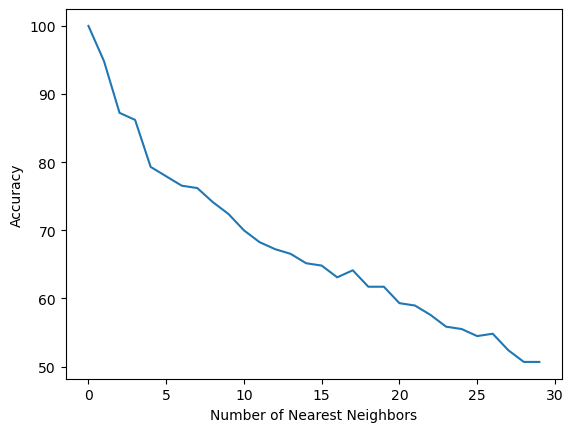

In [80]:
helper = plt.plot(helperArrForGraph)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Accuracy')
plt.show()